Berikut adalah kode dari Decision Tree menggunakan sklearn

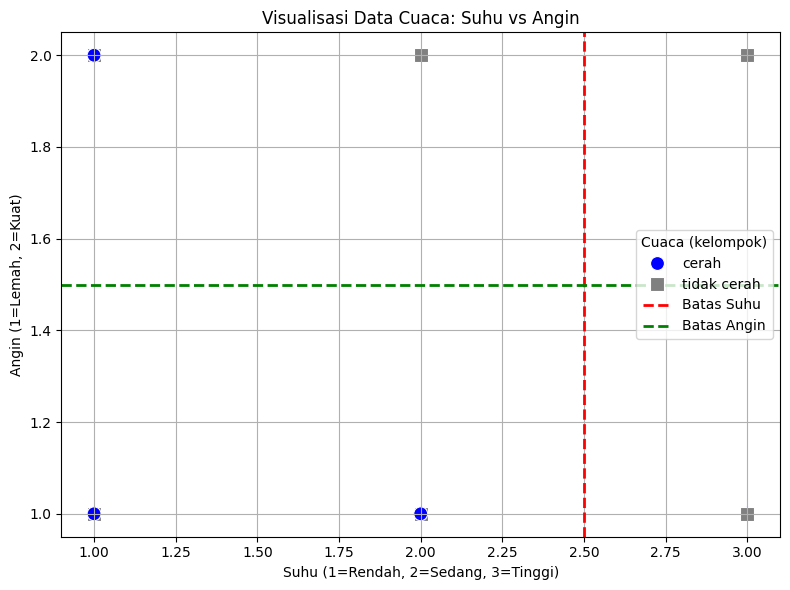

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Buat DataFrame dari data yang kamu berikan
data = {
    'No': list(range(1, 16)),
    'Suhu': ['Tinggi', 'Tinggi', 'Sedang', 'Rendah', 'Rendah', 'Rendah', 'Sedang', 'Tinggi', 'Tinggi', 'Rendah', 'Tinggi', 'Sedang', 'Sedang', 'Sedang', 'Rendah'],
    'Angin': ['Lemah', 'Kuat', 'Lemah', 'Lemah', 'Kuat', 'Kuat', 'Lemah', 'Lemah', 'Kuat', 'Lemah', 'Lemah', 'Kuat', 'Lemah', 'Kuat', 'Kuat'],
    'Cuaca': ['Cerah', 'Cerah', 'Mendung', 'Hujan', 'Hujan', 'Cerah', 'Mendung', 'Hujan', 'Hujan', 'Cerah', 'Mendung', 'Mendung', 'Cerah', 'Hujan', 'Cerah']
}

df = pd.DataFrame(data)

# Label encoding manual untuk plotting
map_suhu = {'Rendah': 1, 'Sedang': 2, 'Tinggi': 3}
map_angin = {'Lemah': 1, 'Kuat': 2}
map_cuaca = {'Cerah': 'cerah', 'Hujan': 'tidak cerah', 'Mendung': 'tidak cerah'}

df['suhu_num'] = df['Suhu'].map(map_suhu)
df['angin_num'] = df['Angin'].map(map_angin)
df['cuaca_grouped'] = df['Cuaca'].map(map_cuaca)

# Visualisasi seperti scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='suhu_num',
    y='angin_num',
    hue='cuaca_grouped',
    style='cuaca_grouped',
    palette={'cerah': 'blue', 'tidak cerah': 'gray'},
    markers={'cerah': 'o', 'tidak cerah': 's'},
    s=100
)

# Tambahkan garis batas sederhana (contoh threshold)
plt.axvline(x=2.5, color='red', linestyle='--', linewidth=2, label='Batas Suhu')
plt.axhline(y=1.5, color='green', linestyle='--', linewidth=2, label='Batas Angin')

# Label dan judul
plt.title('Visualisasi Data Cuaca: Suhu vs Angin')
plt.xlabel('Suhu (1=Rendah, 2=Sedang, 3=Tinggi)')
plt.ylabel('Angin (1=Lemah, 2=Kuat)')

plt.legend(title='Cuaca (kelompok)')
plt.grid(True)
plt.tight_layout()
plt.show()

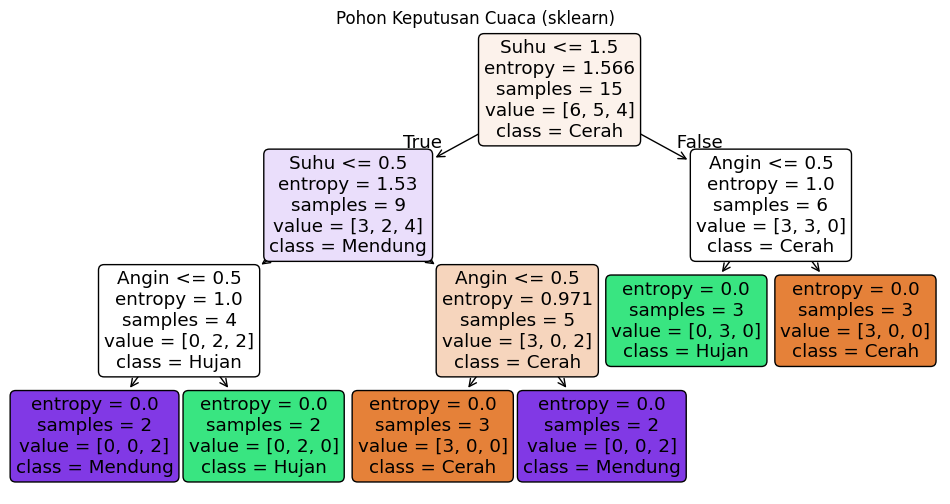

In [3]:
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Data asli
data = {
    'Suhu': ['Tinggi', 'Tinggi', 'Sedang', 'Sedang', 'Rendah', 'Rendah', 'Tinggi', 'Tinggi', 'Sedang', 'Sedang', 'Rendah', 'Rendah', 'Tinggi', 'Sedang', 'Tinggi'],
    'Angin': ['Lemah', 'Kuat', 'Lemah', 'Kuat', 'Lemah', 'Kuat', 'Lemah', 'Kuat', 'Lemah', 'Kuat', 'Lemah', 'Kuat', 'Lemah', 'Kuat', 'Kuat'],
    'Cuaca': ['Cerah', 'Hujan', 'Mendung', 'Cerah', 'Hujan', 'Mendung', 'Cerah', 'Hujan', 'Mendung', 'Cerah', 'Hujan', 'Mendung', 'Cerah', 'Cerah', 'Hujan']
}

df = pd.DataFrame(data)

# Encode data kategorikal menjadi numerik
le_suhu = LabelEncoder()
le_angin = LabelEncoder()
le_cuaca = LabelEncoder()

df['Suhu_enc'] = le_suhu.fit_transform(df['Suhu'])
df['Angin_enc'] = le_angin.fit_transform(df['Angin'])
df['Cuaca_enc'] = le_cuaca.fit_transform(df['Cuaca'])

# Fitur dan target
X = df[['Suhu_enc', 'Angin_enc']]
y = df['Cuaca_enc']

# Decision Tree Classifier
clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
clf = clf.fit(X, y)

# Plot pohon keputusan
plt.figure(figsize=(12, 6))
tree.plot_tree(clf, 
               feature_names=['Suhu', 'Angin'], 
               class_names=le_cuaca.classes_, 
               filled=True, 
               rounded=True)
plt.title("Pohon Keputusan Cuaca (sklearn)")
plt.show()


+----+--------+-------+---------+
| No | Suhu   | Angin | Cuaca   |
+----+--------+-------+---------+
| 1  | Tinggi | Lemah | Cerah   |
| 2  | Tinggi | Kuat  | Hujan   |
| 3  | Sedang | Lemah | Mendung |
| 4  | Sedang | Kuat  | Cerah   |
| 5  | Rendah | Lemah | Hujan   |
| 6  | Rendah | Kuat  | Mendung |
| 7  | Tinggi | Lemah | Cerah   |
| 8  | Tinggi | Kuat  | Hujan   |
| 9  | Sedang | Lemah | Mendung |
| 10 | Sedang | Kuat  | Cerah   |
| 11 | Rendah | Lemah | Hujan   |
| 12 | Rendah | Kuat  | Mendung |
| 13 | Tinggi | Lemah | Cerah   |
| 14 | Sedang | Kuat  | Cerah   |
| 15 | Tinggi | Kuat  | Hujan   |
+----+--------+-------+---------+

Aturan (Rules) dari Pohon Keputusan:
1. Jika Suhu = Rendah dan Angin = Lemah → Cuaca = Hujan
2. Jika Suhu = Rendah dan Angin = Kuat → Cuaca = Mendung
3. Jika Suhu = Sedang dan Angin = Lemah → Cuaca = Mendung
4. Jika Suhu = Sedang dan Angin = Kuat → Cuaca = Cerah
5. Jika Suhu = Tinggi dan Angin = Lemah → Cuaca = Cerah
6. Jika Suhu = Tinggi dan Angin = Kuat → Cuaca = Hujan

Berikut ini memproses dan menguji data baru

+--------+-------+----------------+
| Suhu   | Angin | Prediksi Cuaca |
| ------ | ----- | -------------- |
| Tinggi | Lemah | **Cerah**      |
| Rendah | Kuat  | **Mendung**    |
+--------+-------+----------------+

Penjelasan:
Baris 1 cocok dengan Rule #5
Baris 2 cocok dengan Rule #2

In [4]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text

# Data asli
data = {
    'Suhu': ['Tinggi','Tinggi','Sedang','Rendah','Rendah','Rendah','Sedang','Tinggi','Tinggi','Rendah','Tinggi','Sedang','Sedang','Sedang','Rendah'],
    'Angin': ['Lemah','Kuat','Lemah','Lemah','Kuat','Kuat','Lemah','Lemah','Kuat','Lemah','Lemah','Kuat','Lemah','Kuat','Kuat'],
    'Cuaca': ['Cerah','Cerah','Mendung','Hujan','Hujan','Cerah','Mendung','Hujan','Hujan','Cerah','Mendung','Mendung','Cerah','Hujan','Cerah']
}

df = pd.DataFrame(data)

# Encode data
encode_suhu = {'Tinggi': 0, 'Sedang': 1, 'Rendah': 2}
encode_angin = {'Lemah': 0, 'Kuat': 1}
encode_cuaca = {'Cerah': 0, 'Mendung': 1, 'Hujan': 2}
decode_cuaca = {v: k for k, v in encode_cuaca.items()}

df['Suhu'] = df['Suhu'].map(encode_suhu)
df['Angin'] = df['Angin'].map(encode_angin)
df['Cuaca'] = df['Cuaca'].map(encode_cuaca)

X = df[['Suhu', 'Angin']]
y = df['Cuaca']

# Model
clf = DecisionTreeClassifier(criterion="entropy", max_depth=2)
clf.fit(X, y)

# Uji data baru
uji = pd.DataFrame({
    'Suhu': [0, 2],      # Tinggi, Rendah
    'Angin': [0, 1]      # Lemah, Kuat
})

# Prediksi dan tampilkan hasilnya
hasil = clf.predict(uji)
hasil = [decode_cuaca[x] for x in hasil]
uji['Prediksi Sklearn'] = hasil

print(uji)
print(export_text(clf, feature_names=['Suhu', 'Angin']))

   Suhu  Angin Prediksi Sklearn
0     0      0            Cerah
1     2      1            Cerah
|--- Suhu <= 1.50
|   |--- Suhu <= 0.50
|   |   |--- class: 0
|   |--- Suhu >  0.50
|   |   |--- class: 1
|--- Suhu >  1.50
|   |--- Angin <= 0.50
|   |   |--- class: 0
|   |--- Angin >  0.50
|   |   |--- class: 0



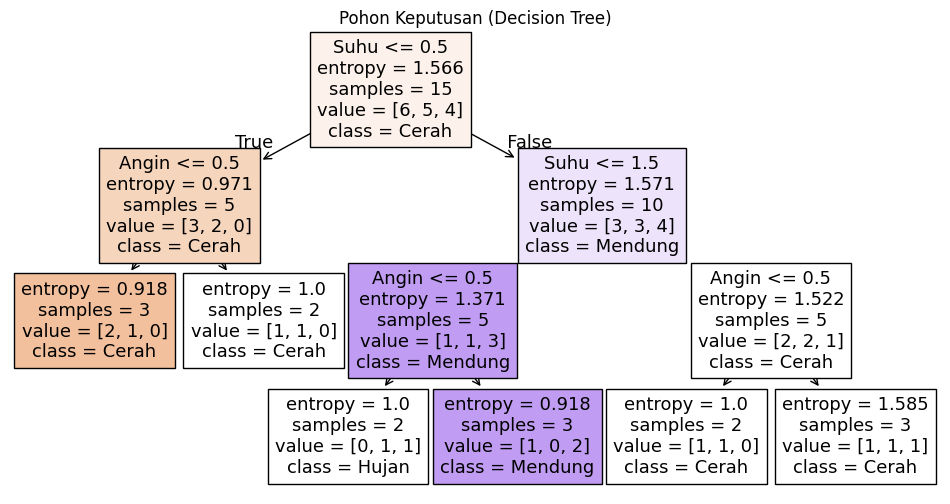

Data Uji #1: Prediksi Cuaca = Cerah
Data Uji #2: Prediksi Cuaca = Cerah


In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# 1. Data latih
data = {
    'Suhu': ['Tinggi','Tinggi','Sedang','Rendah','Rendah','Rendah','Sedang','Tinggi','Tinggi','Rendah','Tinggi','Sedang','Sedang','Sedang','Rendah'],
    'Angin': ['Lemah','Kuat','Lemah','Lemah','Kuat','Kuat','Lemah','Lemah','Kuat','Lemah','Lemah','Kuat','Lemah','Kuat','Kuat'],
    'Cuaca': ['Cerah','Cerah','Mendung','Hujan','Hujan','Cerah','Mendung','Hujan','Hujan','Cerah','Mendung','Mendung','Cerah','Hujan','Cerah']
}

df = pd.DataFrame(data)

# 2. Label Encoding
le_suhu = LabelEncoder()
le_angin = LabelEncoder()
le_cuaca = LabelEncoder()

df['Suhu_enc'] = le_suhu.fit_transform(df['Suhu'])
df['Angin_enc'] = le_angin.fit_transform(df['Angin'])
df['Cuaca_enc'] = le_cuaca.fit_transform(df['Cuaca'])

# 3. Model Training
X = df[['Suhu_enc', 'Angin_enc']]
y = df['Cuaca_enc']

clf = DecisionTreeClassifier(criterion='entropy', random_state=0)
clf.fit(X, y)

# 4. Visualisasi Pohon Keputusan
plt.figure(figsize=(12, 6))
plot_tree(clf,
          feature_names=['Suhu', 'Angin'],
          class_names=le_cuaca.classes_,
          filled=True)
plt.title("Pohon Keputusan (Decision Tree)")
plt.show()

# 5. Prediksi Data Baru
data_uji = pd.DataFrame({
    'Suhu': ['Tinggi', 'Rendah'],
    'Angin': ['Lemah', 'Kuat']
})

# Transformasi label
data_uji['Suhu_enc'] = le_suhu.transform(data_uji['Suhu'])
data_uji['Angin_enc'] = le_angin.transform(data_uji['Angin'])

X_uji = data_uji[['Suhu_enc', 'Angin_enc']]
prediksi = clf.predict(X_uji)
hasil_prediksi = le_cuaca.inverse_transform(prediksi)

# 6. Tampilkan Hasil Prediksi
for i, cuaca in enumerate(hasil_prediksi, start=1):
    print(f"Data Uji #{i}: Prediksi Cuaca = {cuaca}")
